X.shape=(2, 400) Y.shape=(1, 400) m=400


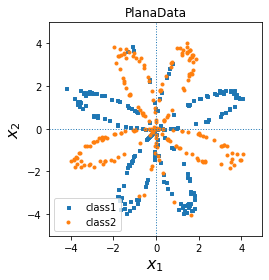

In [15]:
import joy
X, Y = joy.planar_data()
m = X.shape[1]
print('X.shape={} Y.shape={} m={}'.format(X.shape, Y.shape, m))
joy.plot_xyw(X.T, Y.squeeze(), title='PlanaData')

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hidden neurons=3, accuracy=72.99')

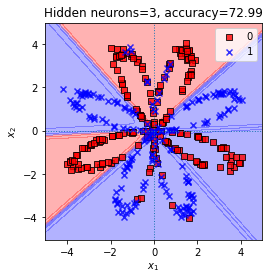

In [20]:
n_h = 3

net_arch = [2, n_h, 1]
nn = joy.NeuralNetwork(net_arch, eta=0.1, epochs=100)
nn.fit(X, Y)

joy.plot_decision_regions(X.T, Y, nn)
yhat = nn.predict(X.T)

accuracy = float(np.dot(Y, yhat.T) + np.dot(1 - Y, 1 - yhat.T)) / Y.size * 100

plt.title('Hidden neurons={}, accuracy={}'.format(n_h, np.round(accuracy, 2)))

[0]processing 2 neurons case....
[1]processing 3 neurons case....
[2]processing 4 neurons case....
[3]processing 8 neurons case....
[4]processing 16 neurons case....
[5]processing 32 neurons case....
[6]processing 64 neurons case....
[7]processing 128 neurons case....


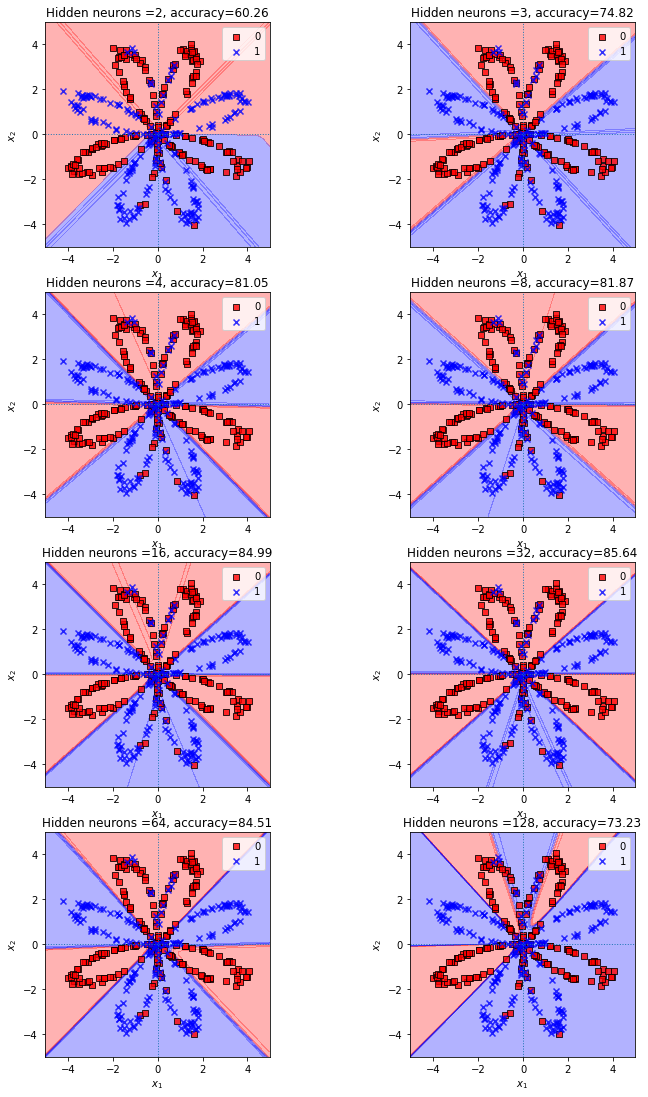

In [23]:
X, Y = joy.planar_data()
plt.figure(figsize=(12, 24))
accuracy = []
number_of_neurons = [2,3,4,8,16,32,64,128]

for i, n_h in enumerate(number_of_neurons) :
    print('[{}]processing {} neurons case....'.format(i, n_h))
    net_arch = [2,1]
    net_arch.insert(1, n_h)
    nn = joy.NeuralNetwork(net_arch, eta=0.1, epochs=200)
    nn.fit(X,Y)
    
    plt.subplot(5, 2, i+1)
    joy.plot_decision_regions(X.T, Y, nn)
    yhat = nn.predict(X.T)
    accuracy.append(float(np.dot(Y, yhat.T) + np.dot(1 - Y, 1 - yhat.T)) / Y.size * 100)
    plt.title('Hidden neurons ={}, accuracy={}'.format(n_h, np.round(accuracy[i],2)))

X.shape :  (2, 400)
Y.shape :  (400,)
[72.99474537]


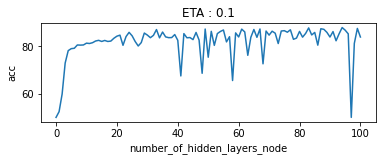

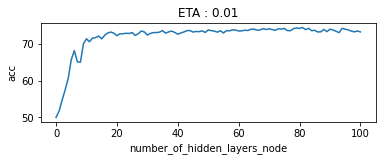

In [62]:
#데이터 호출
X,Y = joy.planar_data()

Y = Y.squeeze()

print("X.shape : ", X.shape)
print("Y.shape : ", Y.shape)

#모델 생성

n_h = 3
net_arch = [2, n_h, 1]
nn = joy.NeuralNetwork(net_arch, eta=0.1, epochs=100)
nn.fit(X, Y)

yhat = nn.predict(X.T) #왜 예측할 땐 전치?
accuracy = (np.dot(Y, yhat.T) + np.dot(1-Y, 1-yhat.T)) / Y.size * 100 
#np.dot(Y, yhat.T) 에서 Y는 0 또는 1의 분류문제,  yhat.T와 내적하면 y가 1인 예측값의 예상치의 총합이되고, 1-Y는 정확히 그 반대의 값을 예측한다.
#해당 레이블의 수는 Y.size와 동일하므로, 이를 Y.size로 나누면 평균 예측 정확도가 된다.
print(accuracy)


#plt.figure(figsize=(10,20))
#시각화

eta_list = [0.1, 0.01]
for j, eta in enumerate(eta_list) :
    accuracy_history = []
    for i, h in enumerate(range(0, 101)):
        n_h = h
        net_arch = [2, n_h, 1]
        nn = joy.NeuralNetwork(net_arch, eta=eta, epochs=100)
        nn.fit(X, Y)

        yhat = nn.predict(X.T)

        accuracy = (np.dot(Y, yhat.T) + np.dot(1-Y, 1-yhat.T)) / Y.size * 100
        accuracy_history.append(accuracy)

    plt.subplot(len(eta_list),1, j+1)
    plt.plot(accuracy_history)
    plt.xlabel('number_of_hidden_layers_node')
    plt.ylabel('acc')
    plt.title('ETA : {}'.format(eta))
    plt.show()

## 로지스틱 회귀

결과값 = 확률 (0 ~ 1)